## Pridecting Stock Price using LSTM(Long short term memory)

First step is to importing the Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Improting dataset

In [25]:
apple = pd.read_csv('AAPL.csv')
apple

Date        Open        High         Low       Close   Adj Close  \
0    2018-10-18  217.860001  219.740005  213.000000  216.020004  212.719086   
1    2018-10-19  218.059998  221.259995  217.429993  219.309998  215.958801   
2    2018-10-22  219.789993  223.360001  218.940002  220.649994  217.278320   
3    2018-10-23  215.830002  223.250000  214.699997  222.729996  219.326538   
4    2018-10-24  222.600006  224.229996  214.539993  215.089996  211.803284   
..          ...         ...         ...         ...         ...         ...   
246  2019-10-11  232.949997  237.639999  232.309998  236.210007  236.210007   
247  2019-10-14  234.899994  238.130005  234.669998  235.869995  235.869995   
248  2019-10-15  236.389999  237.649994  234.880005  235.320007  235.320007   
249  2019-10-16  233.369995  235.240005  233.199997  234.369995  234.369995   
250  2019-10-17  235.089996  236.149994  233.520004  235.279999  235.279999   

       Volume  
0    32581300  
1    33078700  
2    28792100  
3    38767800  
4    40925500  
..        ...  
246  41698900  
247  24106900  
248  21840000  
249  18475800  
250  16896300  

[251 rows x 7 columns]

we are only interested in the opening price of the stock. Therefore, we will filter all the data from our training set and will retain only the values for the Open column. 

In [14]:
training = apple.iloc[:, 1:2].values

## Data Normalization

As a rule of thumb, whenever you use a neural network, you should normalize or scale your data. We will use MinMaxScaler class from the sklear.preprocessing library to scale our data between 0 and 1. The feature_range parameter is used to specify the range of the scaled data.

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(training)

## Convert Training Data to Right Shape

In a time series problems, we have to predict a value at time T, based on the data from days T-N where N can be any number of steps. Here, we are going to predict the opening stock price of the data based on the opening stock prices for the past 60 days. 

Our feature set should contain the opening stock price values for the past 60 days while the label or dependent variable should be the stock price at the 61st day. 

In [31]:
features_set = []
labels = []
for i in range(60, 251):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

In the script above we create two lists: feature_set and labels. There are 251 records in the training data. We execute a loop that starts from 61st record and stores all the previous 60 records to the feature_set list. The 61st record is stored in the labels list.

We need to convert both the feature_set and the labels list to the numpy array before we can use it for training.

In [32]:
features_set, labels = np.array(features_set), np.array(labels)

In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM. We need to convert our data into three-dimensional format. The first dimension is the number of records or rows in the dataset which is 251 in our case. The second dimension is the number of time steps which is 60 while the last dimension is the number of indicators. Since we are only using one feature, i.e Open, the number of indicators will be one.

In [36]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

## Training The LSTM

We have preprocessed our data and have converted it into the desired format. now is the time to create our LSTM. The LSTM model that we are going to create will be a sequential model with multiple layers. We will add four LSTM layers to our model followed by a dense layer that predicts the future stock price.

Let's first import the libraries that we are going to need in order to create our model:

In [60]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In the script above we imported the Sequential class from keras.models library and Dense, LSTM, and Dropout classes from keras.layers library.


As a first step, we need to instantiate the Sequential class. This will be our model class and we will add LSTM, Dropout and Dense layers to this model. 

In [61]:
model = Sequential()

Creating LSTM and Dropout Layers

Let's add LSTM layer to the model that we just created. 

In [62]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

To add a layer to the sequential model, the add method is used. Inside the add method, we passed our LSTM layer. The first parameter to the LSTM layer is the number of neurons or nodes that we want in the layer. The second parameter is return_sequences, which is set to true since we will add more layers to the model. The first parameter to the input_shape is the number of time steps while the last parameter is the number of indicators.

Let's now add a dropout layer to our model. Dropout layer is added to avoid over-fitting, which is a phenomenon where a machine learning model performs better on the training data compared to the test data.

In [63]:
model.add(Dropout(0.2))

In [64]:
#Let's add three more LSTM and dropout layers to our model.

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

## Creating Dense Layer

To make our model more robust, we add a dense layer at the end of the model. The number of neurons in the dense layer will be set to 1 since we want to predict a single value in the output.

In [65]:
model.add(Dense(units = 1))

## Model Compilation


Finally, we need to compile our LSTM before we can train it on the training data. 

In [66]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

We call the compile method on the Sequential model object which is "model" in our case. We use the mean squared error as loss function and to reduce the loss or to optimize the algorithm, we use the adam optimizer.

## Algorithm Training

Now is the time to train the model that we defined in the previous few steps. To do so, we call the fit method on the model and pass it our training features and labels as shown below:

In [67]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
191/191 [==============================] - 7s 36ms/step - loss: 0.1985
Epoch 2/100
191/191 [==============================] - 2s 13ms/step - loss: 0.0381
Epoch 3/100
191/191 [==============================] - 3s 15ms/step - loss: 0.0355
Epoch 4/100
191/191 [==============================] - 3s 14ms/step - loss: 0.0222
Epoch 5/100
191/191 [==============================] - 3s 15ms/step - loss: 0.0220
Epoch 6/100
191/191 [==============================] - 3s 14ms/step - loss: 0.0176
Epoch 7/100
191/191 [==============================] - 3s 14ms/step - loss: 0.0170
Epoch 8/100
191/191 [==============================] - 3s 14ms/step - loss: 0.0152
Epoch 9/100
191/191 [==============================] - 3s 15ms/step - loss: 0.0152
Epoch 10/100
191/191 [==============================] - 3s 14ms/step - loss: 0.0148
Epoch 11/100
191/191 [==============================] - 3s 14ms/step - loss: 0.0147
Epoch 12/100
191/191 [==============================] - 3s 14ms/step - loss: 0.0145
E

191/191 [==============================] - 3s 13ms/step - loss: 0.0071
Epoch 99/100
191/191 [==============================] - 2s 13ms/step - loss: 0.0066
Epoch 100/100
191/191 [==============================] - 2s 12ms/step - loss: 0.0066


## Testing our LSTM

We have successfully trained our LSTM, now is the time to test the performance of our algorithm on the test set by predicting the opening stock prices for the month of January 2018. However, as we did with the training data, we need to convert our test data in the right format.

In [68]:
apple_testing_complete = pd.read_csv('AAPL.csv')
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

In the above script, we import our test data and as we did with the training data, we removed all the columns from the test data except the column that contains opening stock prices.

##  Converting Test Data to Right Format

For each day of January 2018, we want our feature set to contain the opening stock prices for the previous 60 days. For the 1st of January, we need the stock prices for the previous 60 days. To do so, we need to concatenate our training data and test data before preprocessing.

In [69]:
apple_total = pd.concat((apple['Open'], apple_testing_complete['Open']), axis=0)

Now let's prepare our test inputs. The input for each day should contain the opening stock prices for the previous 60 days. That means we need opening stock prices for the 20 test days for the month of January 2018 and the 60 stock prices from the last 60 days for the training set. 

In [70]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values

In [71]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

We scaled our data, now let's prepare our final test input set that will contain previous 60 stock prices for the month of January.

In [72]:
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

Finally, we need to convert our data into the three-dimensional format which can be used as input to the LSTM.

In [73]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

Making Predictions
Now is the time to see the magic. We preprocessed our test data and now we can use it to make predictions. To do so, we simply need to call the predict method on the model that we trained.

In [74]:
predictions = model.predict(test_features)

Since we scaled our data, the predictions made by the LSTM are also scaled. We need to reverse the scaled prediction back to their actual values. To do so, we can use the ìnverse_transform method of the scaler object we created during training.

In [75]:
predictions = scaler.inverse_transform(predictions)

## Finally, let's see how well did our algorithm predicted the future stock prices.

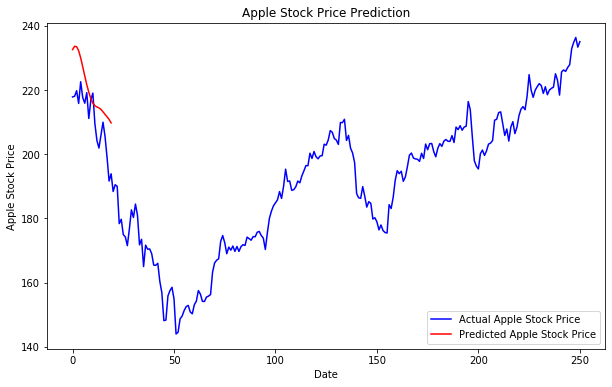

In [76]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In the output, the blue line represents the actual stock prices for the month of January 2018, while the red line represents the predicted stock prices. You can clearly see that our algorithm has been able to capture the overall trend. The predicted prices also see a bullish trend at the beginning followed by a bearish or downwards trend at the end.